In [278]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection

In [8]:
data_df = pd.read_csv("./heart_failure_clinical_records_dataset.csv")
data_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# EDA

In [10]:
data_df.groupby('DEATH_EVENT').mean()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,58.761906,0.408867,540.054187,0.418719,40.26601,0.325123,266657.489901,1.184877,137.216749,0.650246,0.325123,158.339901
1,65.215281,0.479167,670.197917,0.416667,33.46875,0.406250,256381.044792,1.835833,135.375000,0.645833,0.312500,70.885417


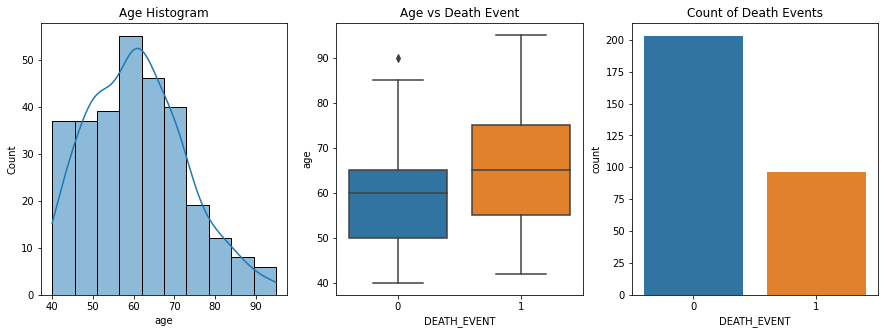

In [26]:
#Age vs. Death Event. 
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(15,5))

sns.histplot(x='age', data=data_df, ax=axes[0],kde=True)
axes[0].set_title("Age Histogram")

sns.boxplot(x='DEATH_EVENT', y='age', data=data_df, ax=axes[1])
axes[1].set_title("Age vs Death Event")


sns.countplot(x='DEATH_EVENT', data=data_df, ax=axes[2])
axes[2].set_title("Count of Death Events")
plt.show()

#### Most of the poeople are bekiw age 65. The median for people who died is 65. Only 1/3 of people died. 

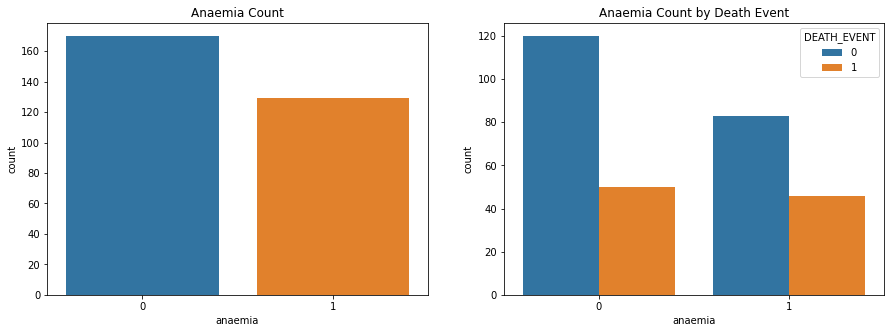

In [49]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))
sns.countplot(x='anaemia', data=data_df, ax=axes[0])
axes[0].set_title("Anaemia Count")

sns.countplot(x='anaemia', data=data_df, hue='DEATH_EVENT', ax=axes[1])
axes[1].set_title("Anaemia Count by Death Event")
plt.show()

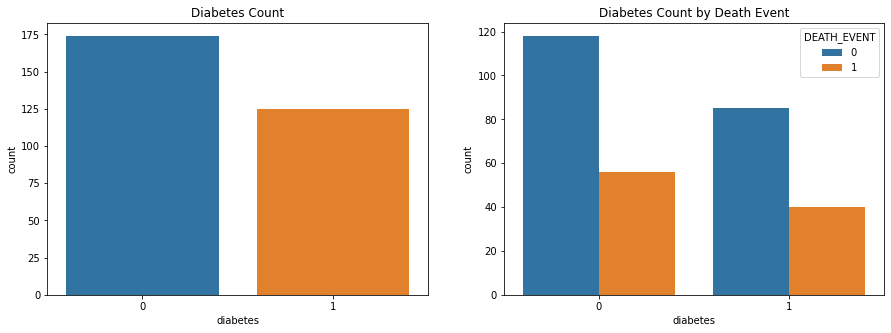

In [51]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))
sns.countplot(x='diabetes', data=data_df, ax=axes[0])
axes[0].set_title("Diabetes Count")

sns.countplot(x='diabetes', data=data_df, hue='DEATH_EVENT', ax=axes[1])
axes[1].set_title("Diabetes Count by Death Event")
plt.show()

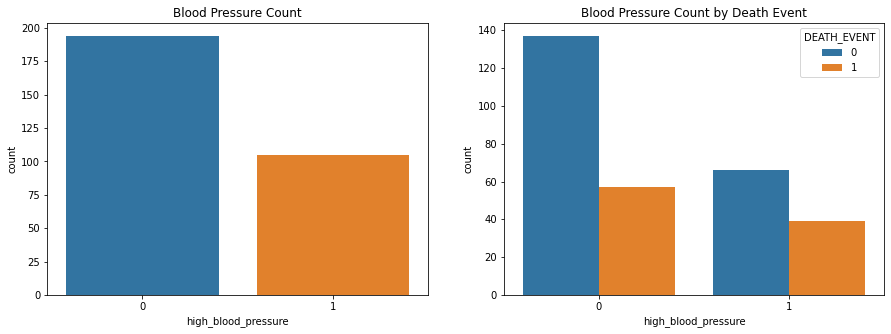

In [52]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))
sns.countplot(x='high_blood_pressure', data=data_df, ax=axes[0])
axes[0].set_title("Blood Pressure Count")

sns.countplot(x='high_blood_pressure', data=data_df, hue='DEATH_EVENT', ax=axes[1])
axes[1].set_title("Blood Pressure Count by Death Event")
plt.show()

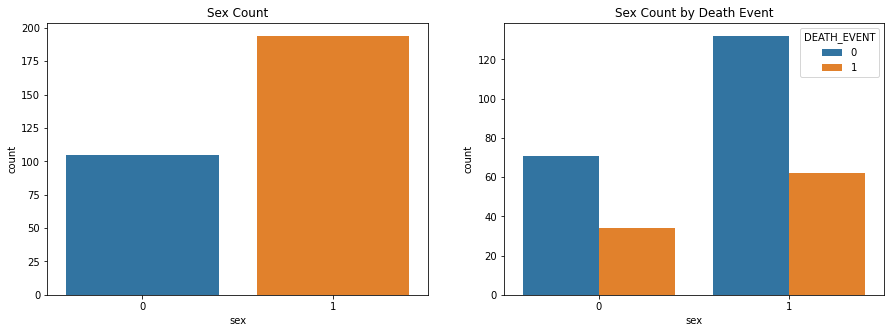

In [53]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))
sns.countplot(x='sex', data=data_df, ax=axes[0])
axes[0].set_title("Sex Count")

sns.countplot(x='sex', data=data_df, hue='DEATH_EVENT', ax=axes[1])
axes[1].set_title("Sex Count by Death Event")
plt.show()

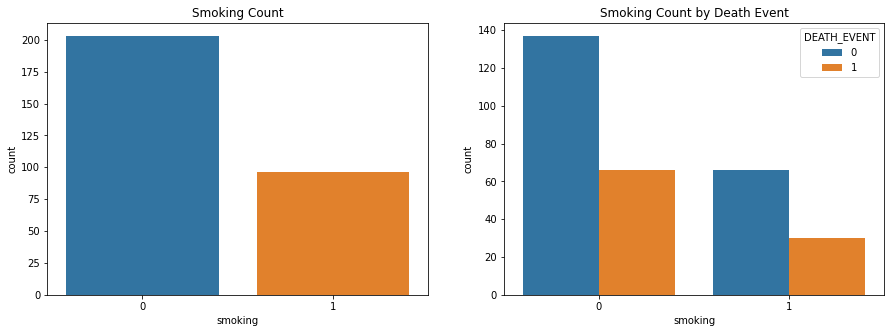

In [54]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))
sns.countplot(x='smoking', data=data_df, ax=axes[0])
axes[0].set_title("Smoking Count")

sns.countplot(x='smoking', data=data_df, hue='DEATH_EVENT', ax=axes[1])
axes[1].set_title("Smoking Count by Death Event")
plt.show()

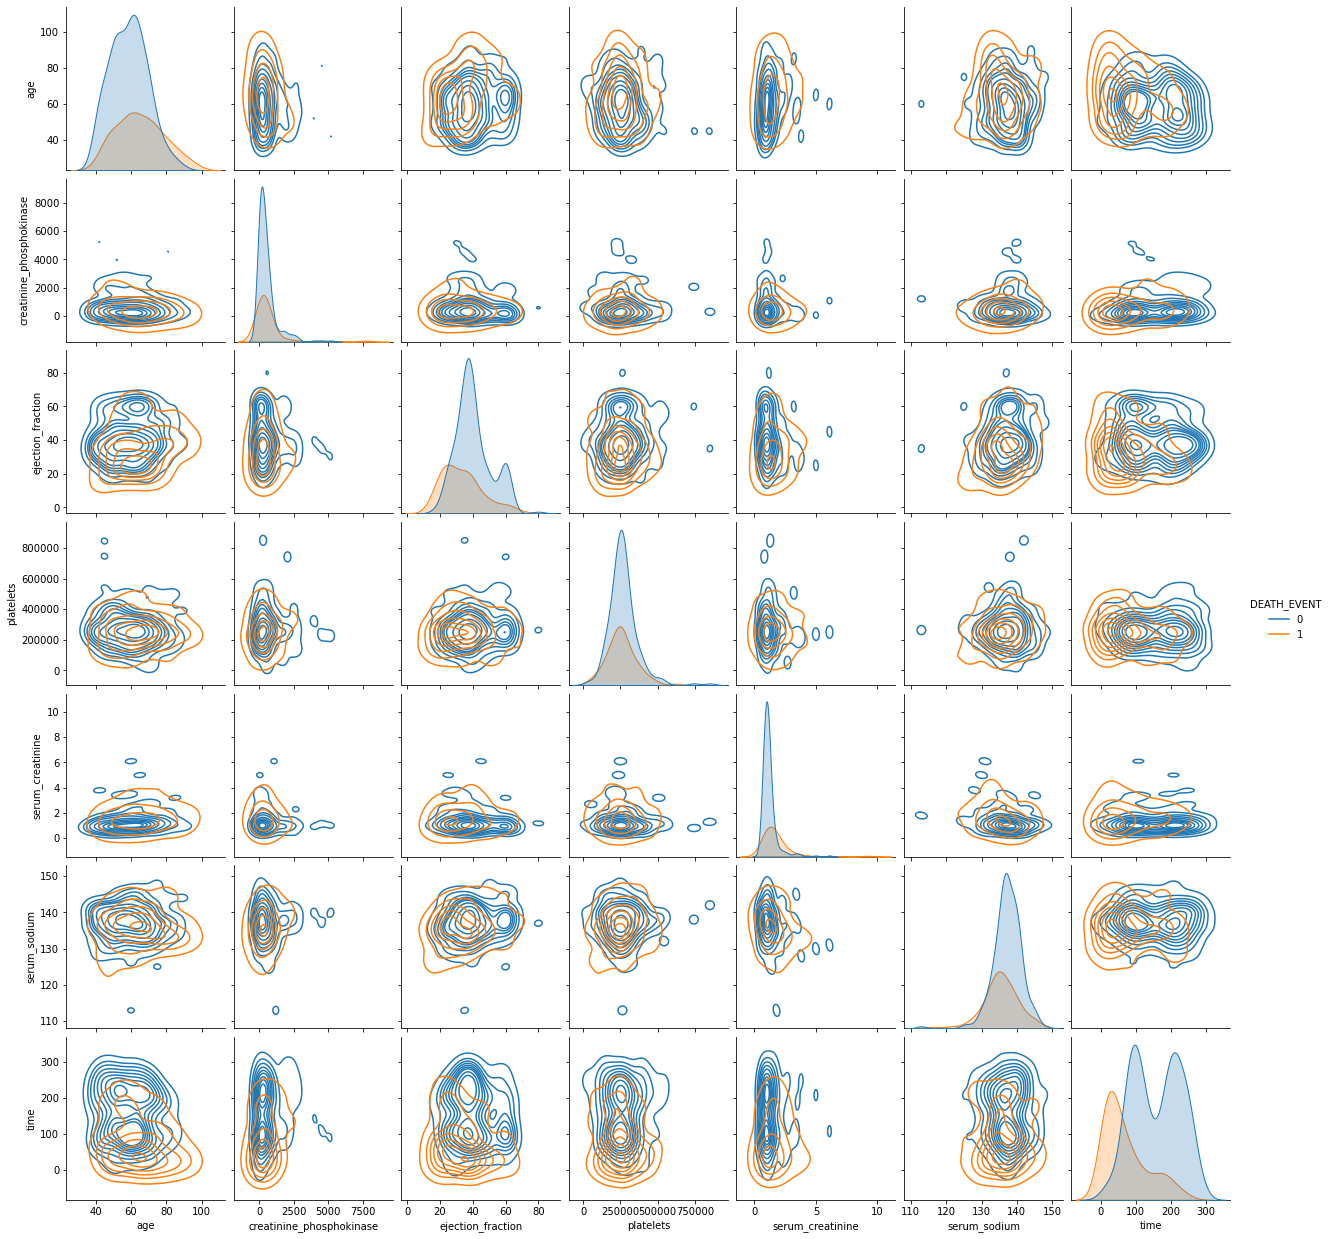

In [102]:
numeric_cols = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time','DEATH_EVENT']
numeric_df = data_df.loc[:, numeric_cols]
sns.pairplot(data=numeric_df, hue='DEATH_EVENT', kind='kde')
plt.show()

#### Most of the data points overlap, the the ones towards the boundaries distingush death event. 

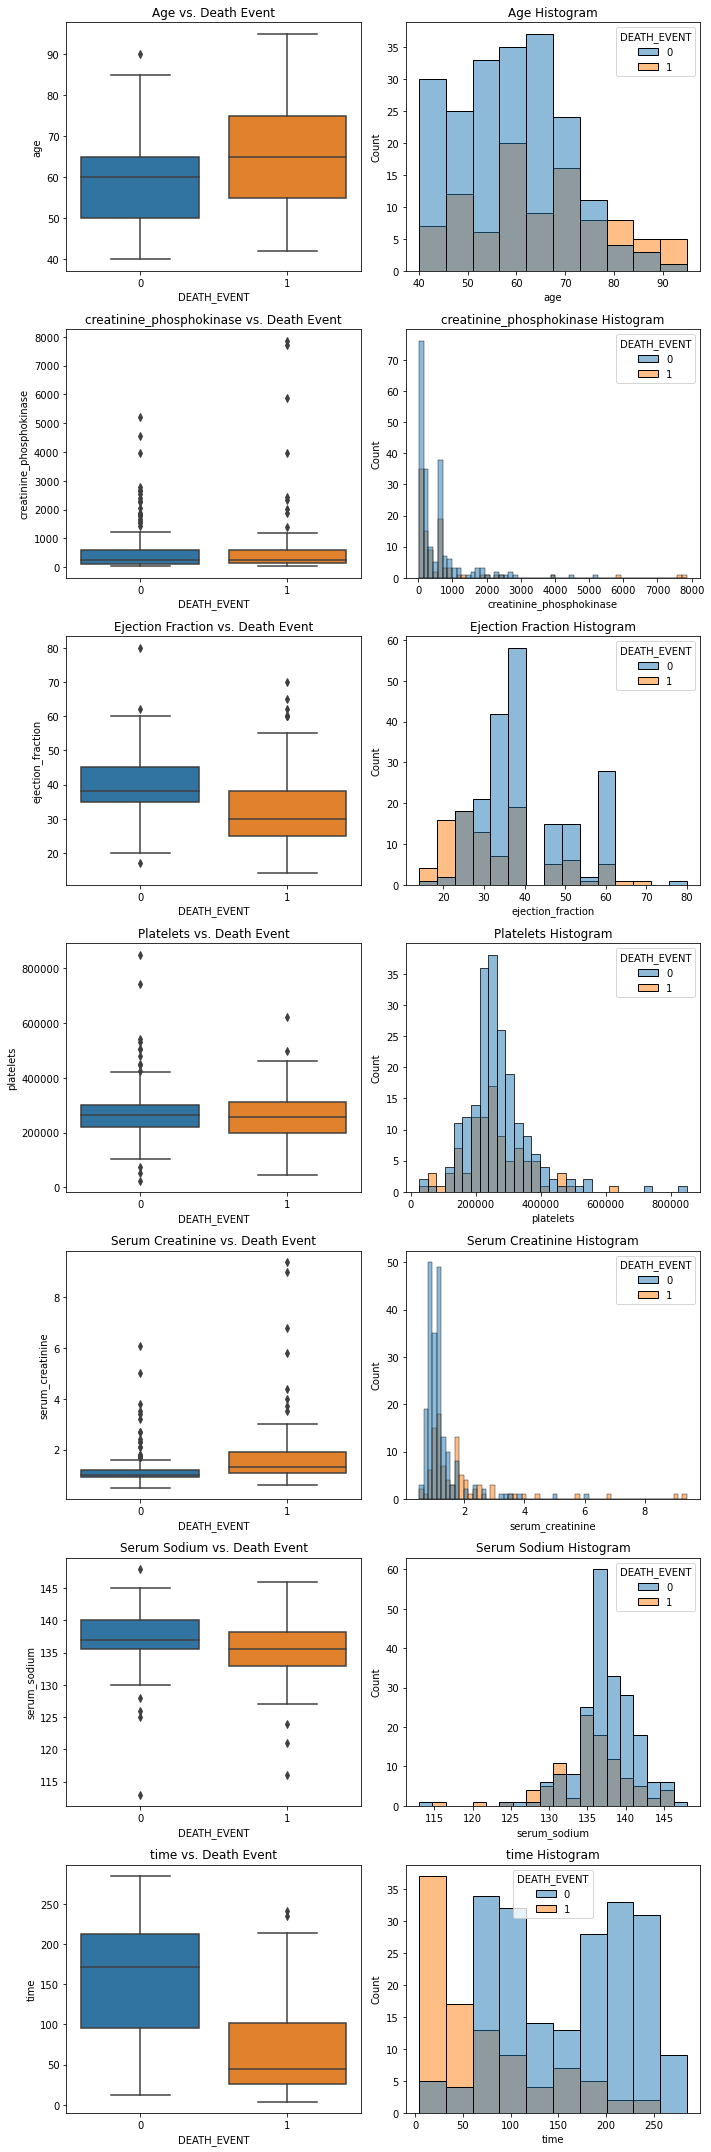

In [209]:
#plot regression plots for all continous variables. 
column_names = np.array(['age', 'creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium', 'time'])
graph_names = np.array(['Age', 'creatinine_phosphokinase','Ejection Fraction','Platelets','Serum Creatinine','Serum Sodium', 'time'])
fig, axes = plt.subplots(figsize=(10,30), ncols=2, nrows=column_names.shape[0])
for row in range(column_names.shape[0]):
    sns.boxplot(x='DEATH_EVENT', y=column_names[row], data=data_df, ax=axes[row, 0])
    axes[row,0].set_title(f'{graph_names[row]} vs. Death Event')
    
    sns.histplot(x=column_names[row], hue='DEATH_EVENT', data=data_df, ax=axes[row, 1])
    axes[row,1].set_title(f'{graph_names[row]} Histogram')

fig.tight_layout()
plt.show()

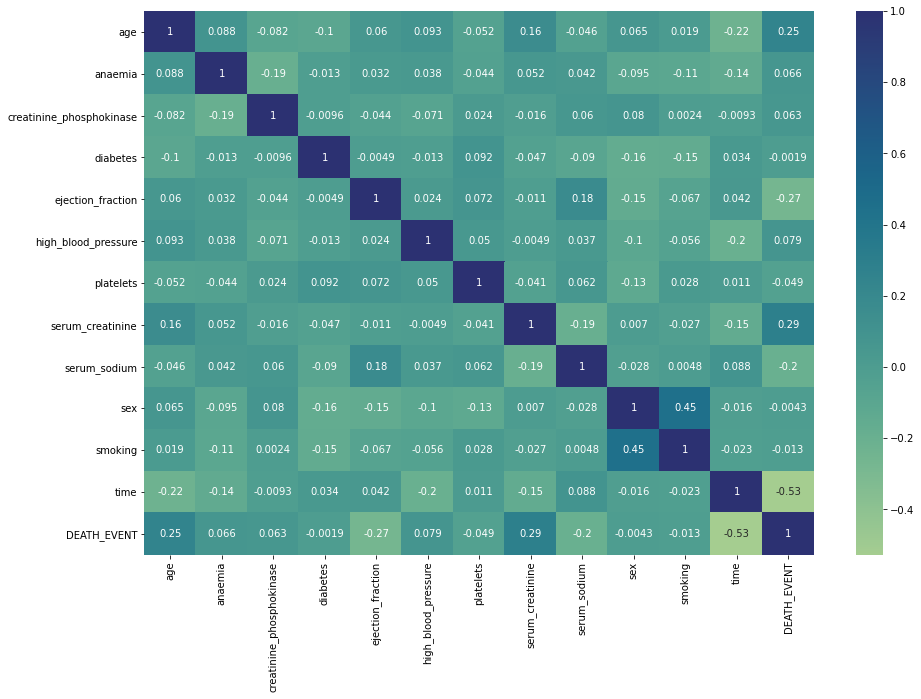

In [68]:
#Correlation.
plt.figure(figsize=(15,10))
sns.heatmap(data_df.corr(), cmap='crest', annot=True)
plt.show()

#### There is not much correlation between any of the features

# Feature Extraction and Pre-processing

In [235]:
#The following features were determined by step-wise logistic regression. i.e. each one was removed and the accuracy was observed.
processed = data_df.drop(['diabetes', 'smoking','sex','platelets','anaemia','creatinine_phosphokinase'], axis=1)

# processed = data_df
X = processed.loc[:, processed.columns != 'DEATH_EVENT']
y = processed.loc[:, 'DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
# #Standard Scaling
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#-------------------------------------------------------
# scores = []
# columns = processed.columns.tolist()
# columns = ["--None--"] + columns
# columns.remove("DEATH_EVENT")
# model = LogisticRegression()
# for column in columns:
#     X = processed.loc[:, (processed.columns != 'DEATH_EVENT') & (processed.columns != column)]
#     y = processed['DEATH_EVENT']

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.fit_transform(X_test)
    
#     model.fit(X_train_scaled, y_train)
#     predictions = model.predict(X_test_scaled)
#     score = model.score(X_test_scaled, y_test)
#     scores.append([column, score])
# print(scores)


# step_wise_df = pd.DataFrame(data=scores, columns=['feature', 'score'])
# step_wise_df.sort_values(by="score", inplace=True)
# step_wise_df

# Model Creation and Training

#### Logistic Regression

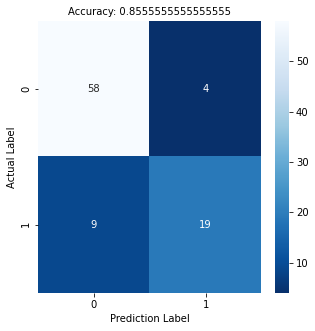

In [236]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = model.score(X_test, y_test)

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap='Blues_r')
plt.xlabel("Prediction Label")
plt.ylabel("Actual Label")
plt.title(f'Accuracy: {score}', size=10)
plt.show()

#### K Nearest Neighbor

In [312]:
param_grid = {
    "n_neighbors" : np.arange(1, 50, 1),
}

model = model_selection.GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = param_grid,
    scoring='accuracy',
    cv=5
)

model.fit(X, y)
print(f'Best Score: {model.best_score_}')
print(model.best_estimator_.get_params)
# predictions = model.predict(X_test)
# test_score = model.score(X_test, y_test)
        
# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
# cm = metrics.confusion_matrix(y_test, predictions)
# sns.heatmap(cm, annot=True, cmap='Blues_r', ax=axes)
# axes.set_xlabel("Prediction Label")
# axes.set_ylabel("Actual Label")
# axes.set_title(f'Accuracy: {test_score}')
# plt.show()

Best Score: 0.7922598870056496
<bound method BaseEstimator.get_params of KNeighborsClassifier(n_neighbors=38)>


#### Decision Tree

In [313]:
param_grid = {
    "criterion" : ["gini","entropy"],
    "splitter" : ["best", "random"],
    "max_leaf_nodes" : np.arange(2,100,1),
    "max_features" : np.arange(1,X_train.shape[1], 1).tolist()
}

model = model_selection.GridSearchCV(
    estimator = DecisionTreeClassifier(),
    param_grid = param_grid,
    scoring='accuracy',
    cv=10
)

model.fit(X, y)
print(f'Best Score: {model.best_score_}')
print(model.best_estimator_.get_params)
# predictions = model.predict(X_test)
# test_score = model.score(X_test, y_test)

# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
# cm = metrics.confusion_matrix(y_test, predictions)
# sns.heatmap(cm, annot=True, cmap='Blues_r', ax=axes)
# axes.set_xlabel("Prediction Label")
# axes.set_ylabel("Actual Label")
# axes.set_title(f'Test Accuracy: {test_score}')
# plt.show()

Best Score: 0.829080459770115
<bound method BaseEstimator.get_params of DecisionTreeClassifier(criterion='entropy', max_features=4, max_leaf_nodes=19,
                       splitter='random')>


#### Random Forest